## Data is a precious thing and will last longer than the systems themselves

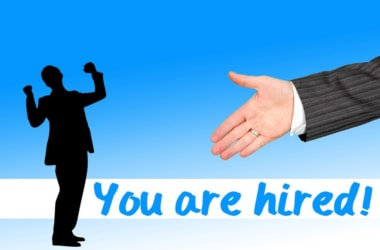

> The objective of this notebook is to analyse the Campus Recruitment data and predict the placements. I have presented the notebook in a form of a beautiful story to make things more clear. The data is straight forward and simple. Its a very small but real life data. A big upvote to the uploader. So let me start my stroy. Please follow on and upvote only after reading the notebook. :)

##### Story is that, one of my roommate "Gaurav" who is worried too much about job placements. One day he came into my room and asked me about some stat and figure about job placements after pursuing MBA, I said bro I dont know much about MBA placements sorry for that but I can help you another way, that I know a good data sate which have much some info about placements in an MBA college.
##### So i can show you this data set and you ask me whatever you want to know I will try to find out. ok?
##### He was very happy on my offer and he just starts many question at once. I said wait bro I need to go and import all my required Data science libraries. Then I need to load the data and later do all the analysis. Be patient.


### Step 1: Importing all libraries and dataset, looking at the data for first time.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv')

#### Me => See, here is your MBA college placements data.

In [ ]:
df.head()

#### Gaurav => I want to look at the best salary awarded and I want to look what is the profile of this person who got this high salary.
#### Me => Yes Gaurav! Here you go.

In [ ]:
df.salary.max()

In [ ]:
df[df['salary'] == 940000.0]

#### Me => Changes some categorical features to integers.
#### Gaurav => Is it necessary?
#### Me => Yes, it will help us to do better analysis the data and makes data more simple.

In [ ]:
# Let's replace 'Workex' , 'status' columns with integers before performing any visualizations i am planning to keep gender same as of now for visualizations.
df['status'] = df['status'].apply(lambda x:1 if x == 'Placed' else 0)
df['workex'] = df['workex'].apply(lambda x:1 if x == 'Yes' else 0)

#### Me => Ok Gaurav, before I start analysis I need to check if our data is proper.
#### Gaurav => What does that mean? 
#### Me => I need to check if there are any missing values in our data or not. Because its difficult to analyse if we have missing values.
#### Gaurav => Ok!! Do it.##### 

In [ ]:
sns.heatmap(df.isnull(),cmap='Blues',cbar=False, yticklabels=False)

#### Me => You see Gaurav, there are so many missing values for salary.
#### Gaurav => Then what should we do? Should we drop them?
#### Me => No! We need to apply what's called as "data intution".
#### Gaurav => Whats that now?
#### Me => We need to guess if these values are missing becuase it wasn't recorded or becuase it dosen't exist? What do you think looking at the status column?
#### Gaurav => Oh yeah! The people not placed will not have salaries. That's simple to guess. 
#### Me => Yes!!!! So now lets make 2 different dataframes one with all placed students and other with non placed students and analyse them.

In [ ]:
placed_df = df[df['status']==1]
not_placed = df[df['status']==0]

#### Me => Ok! Now lets start analyses by looking at the histograms.
#### Gaurav => Oh yeah..

In [ ]:
df.hist(bins=30,color='g',figsize=(14,10),ec="black")

#### Me => What do you see now.
#### Gaurav => So the percentage of students in all stages has good gaussian distribution.  But I want to see what is the average salary that maximum placed students have got. Show me the salary count distribution.
#### Me = > Ok boss!

In [ ]:
var = 'salary'
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
plt.xticks(rotation=90);
sns.countplot(x = var,palette="cool", data = placed_df)
ax.set_xlabel('Salary', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.set_title('Salary Count Distribution', fontsize=15)
sns.despine()

#### Me => Checks the correlations between the numerical values of the data.
#### Gaurav => Why are you doing this. I do not want to know the correlations.
#### Me => But let me check for myself to understand the data more clearly.
#### Gaurav => Whatever!!!

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=1)
correlations = df.corr()
sns.heatmap(correlations,cmap="YlGnBu",linewidths=.5, annot=True)

plt.xticks(fontsize=14, rotation = 90)
plt.yticks(fontsize=14, rotation = 0)
plt.title('Correlations between numerical values of the dataset', fontsize=20)
plt.show()

#### Me => Now you see Gaurav why I did this. Can you see how the ssc, hsc & degree percentage are affecting your placements!!
>  Poor Gaurav with low percentage says nothing. 
#### Me => Don't be upset. Let analyse more. Maybe there are more things for you to look.
#### Gaurav => Yes. Show me if you ssc board, hsc board or the field that you choose. Does that affect placements? How about the gender?
#### Me => Good idea. Lets check it.

In [ ]:
df_to_plot = df[['gender','ssc_b','hsc_b', 'hsc_s', 'degree_t', 'specialisation','workex']]
for i in df_to_plot.columns:
    plt.figure(figsize=(18,8))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlabel=i, fontsize=16)
    plt.ylabel(ylabel='count', fontsize=16)
    sns.countplot(x = i, hue = 'status', data = df, palette="vlag")

#### Me => As you see Gaurav Guys performed better when it comes to placements.
#### Gaurav => That's cool.
#### Me => Also if you see the commerce or management students who took specialisation in Marketing&Finance performed better in placements.
#### Again poor Gaurav who is an electroics engineer now pursuing MBA in Mkt&HR remained silent. He looks more worried now.

#### Me => Just cheer up bro. Take this beer. Tell me what else do you wish to know
#### Gaurav => Can you compare the placed students with non placed students on various categories?
#### Me => Yeah sure! Based on which features??
#### Gaurav => Lets start with percentage obtained in degree.

In [ ]:
plt.figure(figsize = (14,6))
sns.kdeplot(not_placed['degree_p'], label = 'Students not placed', color = 'r', shade = True)
sns.kdeplot(placed_df['degree_p'],label='Students who got placed',color = 'b',shade=True)
plt.xlabel('Percentage obtained in degree')

#### Me => As you see, the students with better degree percentage perforemed better.
#### Gaurav => Now show me for ssc percentage

In [ ]:
plt.figure(figsize = (14,6))
sns.kdeplot(not_placed['ssc_p'], label = 'Students not placed', color = 'r', shade = True)
sns.kdeplot(placed_df['ssc_p'],label='Students who got placed',color = 'b',shade=True)
plt.xlabel('Marks obtained in ssc_b')

#### Me => As you see again, the students with better ssc percentage perforemed better.
#### Gaurav => Now show me for hsc percentage also

In [ ]:
plt.figure(figsize = (14,6))
sns.kdeplot(not_placed['hsc_p'], label = 'Students not placed', color = 'r', shade = True)
sns.kdeplot(placed_df['hsc_p'],label='Students who got placed',color = 'b',shade=True)
plt.xlabel('Marks obtained in hsc_p')

#### Me => As you see once again, the students with better hsc percentage perforemed better.
#### Gaurav => Now show me for etest score.
#### Me => Why do you need to see all this. Its irritating me as I said you already percentage are affecting placements.
#### Gaurav => Show me etest please as I have not given that still. Maybe I can perform better in that and get placed.
#### Me => Ok got you.

In [ ]:
plt.figure(figsize = (14,6))
sns.kdeplot(not_placed['etest_p'], label = 'Students not placed', color = 'r', shade = True)
sns.kdeplot(placed_df['etest_p'],label='Students who got placed',color = 'b',shade=True)
plt.xlabel('Marks obtained in etest')

#### Me => Etest score do not matter much actually.
#### Gaurav => OK!
#### Me => Now I will show you something with heatmaps.

In [ ]:
percentage_corr = df[['ssc_p','hsc_p','degree_p','mba_p','etest_p']]
percentage_corr_df = percentage_corr.corr()
sns.heatmap(percentage_corr_df,cmap="Blues",linewidths=.5, annot=True)

#### Me => Do you see above there is a very good correlations in Percentages of students at all stages of education. That means these students have been doing well in studies all their life so far.
#### Gaurav => Yeah!! Motherfucker so called scholars. 
#### Me => hahah!!!

#### Gaurav => Can you show me some more correlations but I want more simple visualizations.
#### Me => Oh! What's more simple than Boxplot. ;)

#### Me => So you see below. Females has scored more percentage in MBA exams and girls in Mft & finance are really clever.
#### Gaurav => Yeah!! Girls always score more than boys. We boys are not so clever.

In [ ]:
plt.figure(figsize=(14,6))
ax = sns.boxplot(x="specialisation", y="mba_p", hue="gender",
                 data=df, palette="Set3")

#### Me => Yes girls are more clever. But look below Avg salaries of boys are higher than girls. ;)
#### Gaurav => That's gender inequality.
#### Me => Says nothing. 

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x='salary',y='gender',data=placed_df)

#### Me => So Gaurav look below, it seems your branch 'Mkt&Hr' is lagging behind in terms of salaries.
#### Gaurav => Maybe in this college there are more girls in Mkt&Hr than boys. And we saw girls are paid lesser.
#### Me => Makes sense.

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x='salary',y='specialisation',data=placed_df)

#### Me => Good new Gaurav!! The technology people are paid more. Look below.
#### Gaurav => Wow. Can I have one more beer. 
#### Me => Yeah sure.

In [ ]:
plt.figure(figsize=(14,4))
sns.boxplot(x='salary',y='degree_t',data=placed_df)

#### Gaurav => I also would like to see if and how is the salary dependent on Percentage in MBA
#### Me => Lets use a scatter plot for that.

In [ ]:
fig = px.scatter(placed_df,x='mba_p', y='salary')
fig.update_layout(title='Salary v/s Percentage in MBA',xaxis_title="MBA_Per",yaxis_title="Salary")
fig.show()

#### Gaurav => And what about relations between Salary and etest score?
#### Me => You are very demanding.

In [ ]:
fig = px.scatter(placed_df,x='etest_p', y='salary')
fig.update_layout(title='Salary v/s etest_p',xaxis_title="etest_p",yaxis_title="Salary")
fig.show()

#### Gaurav => Thats great so far. Beautiful visuals. Can you show me the distribution of students over different fields?
#### Me => Why not? Lets keep that simple with pie charts.
#### Gaurav => Yes! For me its easier to understand pie graphs.
#### Me => Yes. That are simple but very informative

In [ ]:
grdsp = df.groupby(["degree_t"])[["degree_p"]].mean().reset_index()

fig = px.pie(grdsp,
             values="degree_p",
             names="degree_t",
             template="seaborn")
fig.update_traces(rotation=45, pull=0.01, textinfo="percent+label")
fig.show()

In [ ]:
grdsp = df.groupby(["specialisation"])[["mba_p"]].mean().reset_index()

fig = px.pie(grdsp,
             values="mba_p",
             names="specialisation",
             template="seaborn")
fig.update_traces(rotation=45, pull=0.01, textinfo="percent+label")
fig.show()

In [ ]:
grdsp = df.groupby(["hsc_s"])[["hsc_p"]].mean().reset_index()

fig = px.pie(grdsp,
             values="hsc_p",
             names="hsc_s",
             template="seaborn")
fig.update_traces(rotation=45, pull=0.01, textinfo="percent+label")
fig.show()

#### Me => Ok Gaurav now enough of analyses. Now lets use some machine learning skills.
#### Gaurav => For what? And how will we use it?
#### Me => I will use ML to predict if based on given parameters the student can be placed or not. So we can built an application out of this in future so students can evaluate their changes of getting placed.
#### Gaurav => Woow!! That's awesome. Lets start
#### Me => Yes. First let's drop some unnessary features. Convert gender column to integer and see our new data for ML.

In [ ]:
df_ML_status = df.drop(['sl_no'],axis=1)

In [ ]:
df_ML_status['gender'] = df_ML_status['gender'].apply(lambda x:1 if x == 'M' else 0)

In [ ]:
df_ML_status.head()

#### Me => Now let's do dummies of or data.
#### Gaurav => Whats that?
#### Me => Nothing, just converting out categorical values to integeres as ML models takes no categorical values. ;)

In [ ]:
df_ML_status = pd.get_dummies(df_ML_status, drop_first=True)

#### Me => You see below our converted data. It has not categorical values. 
#### Gaurav => It's amazing how with one line of code you can do all this.
#### Me => Thanks to powerfull python libraries like Pandas. ;)

In [ ]:
df_ML_status.head()

#### Me => Ok! Now lets check the correlations with our new features also.
#### Gaurav => Yeah that's important. But can you make the visual more colorful please. 
#### Me => Yeah sure!!

In [ ]:
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df_ML_status.corr(),vmax=.3, center=0, cmap=cmap,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Me => So for our ML model we need a target feature. Can you guess whats that?
#### Gaurav => Yes. Salary.
#### Me => Sure. We should drop that from our main dataframe and use it later as labels for our supervised learning.
#### Gaurav => Makes sense.

In [ ]:
df_ML_status = df_ML_status.drop(['salary'],axis=1)

#### Me => Before choosing my ML model I always look at the pairplot of the data to understand which model I should choose.
#### Gaurav => So how do you decide.
#### Me => Look below. You see that the data seems well seperated in most of the cases and can be seperated by a line. So I guess simple Logistic Regression would do.
#### Gaurav => I really like the way you are doing it. 
#### Me  => Yes. Logistic Regression saves time. ;)

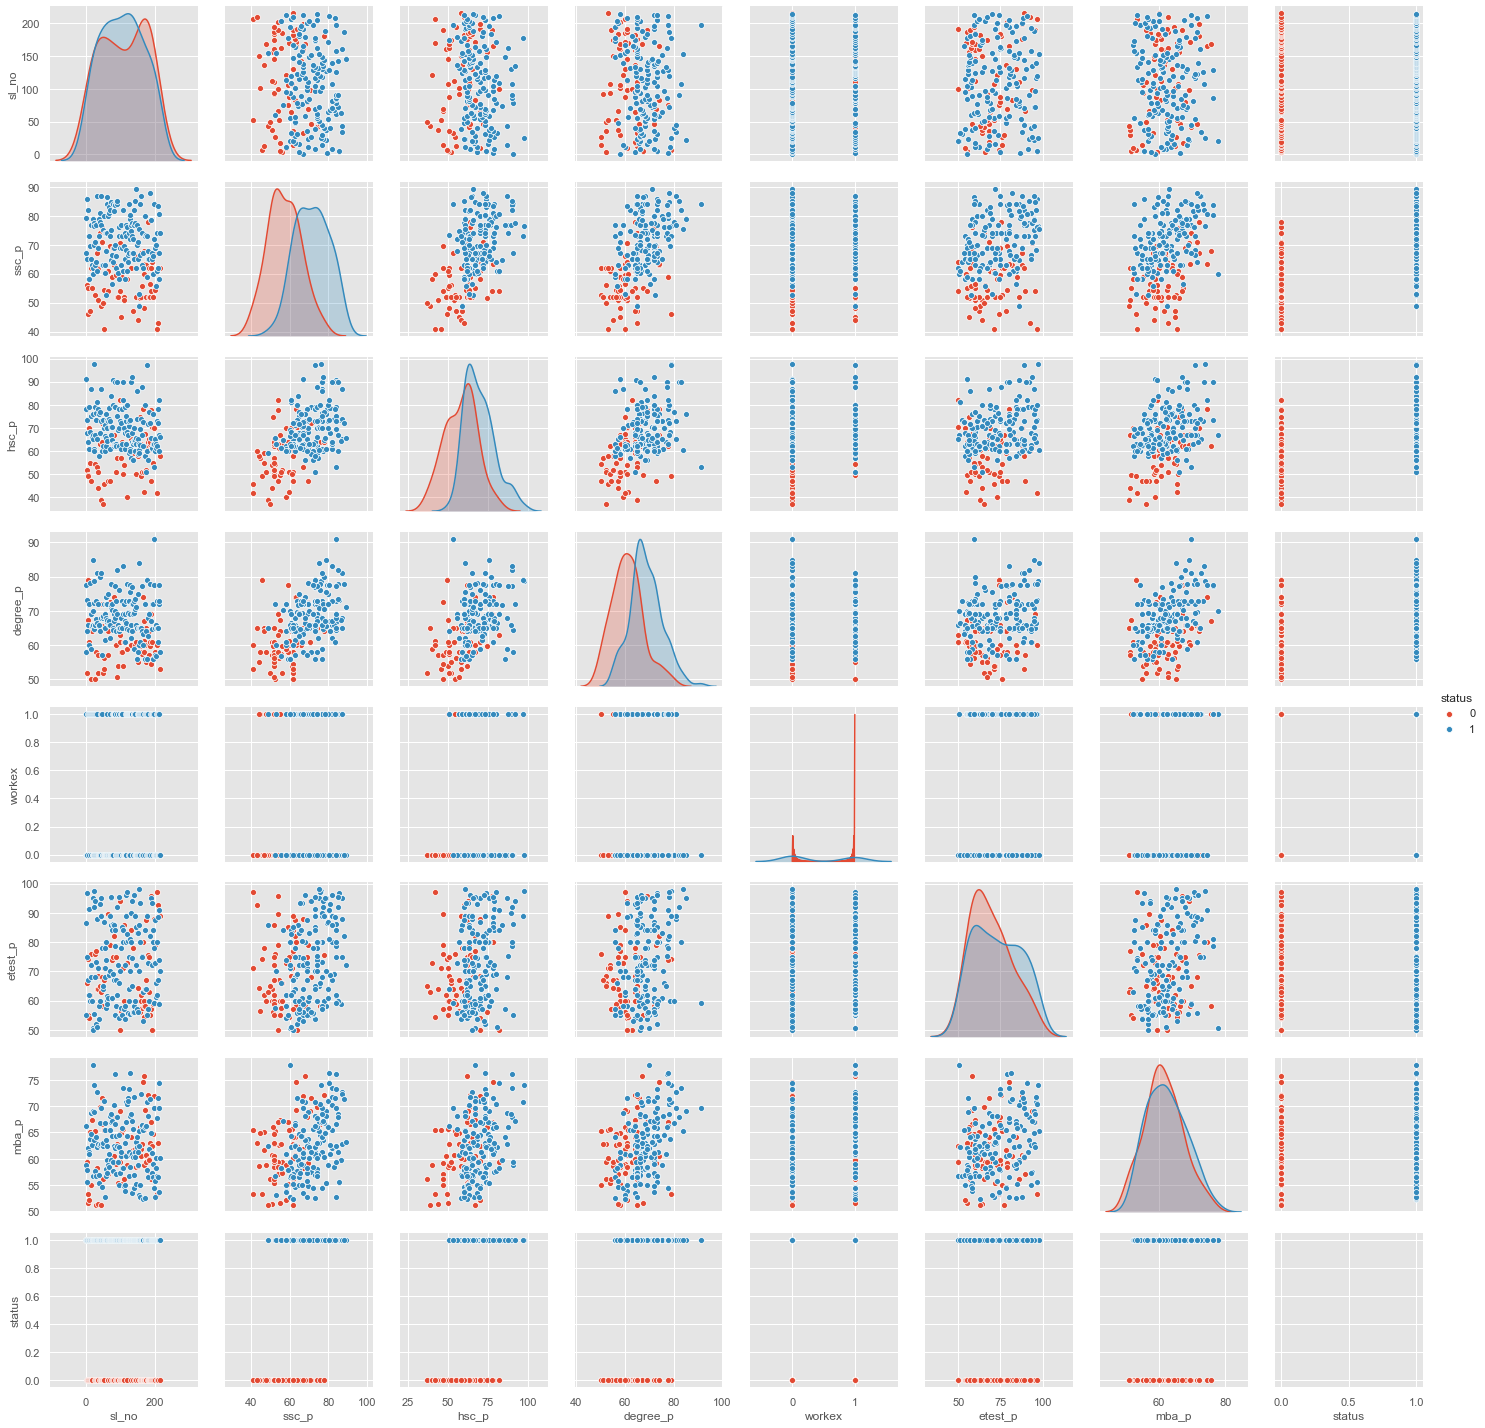

#### Me => Now lets import Logistic regression and train test split.
#### Gaurav => This sklearn seems very powerful.
#### Me => I will tell you about it later in details. ;)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Me => Now status is not of any use to predict salaries

In [ ]:
df_ML_status = df_ML_status.drop('status',axis=1)
y = df['status']

#### Me => Lets split the data of placed students.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df_ML_status,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

#### Me => Now lets fit our data in logistic regression and predict it.

In [ ]:
LR_model=LogisticRegression()
LR_model.fit(X_train,y_train)
predict=LR_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
print(accuracy_score(predict,y_test))

#### Gaurav =>  Wow! We got an accuracy of 88% that impressive
#### Me => Haha! Calm down. Maybe Random forest can do better?
#### Gaurav => Lets check

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train)
predict_rf = rf_model.predict(X_test)

In [ ]:
print(accuracy_score(predict_rf,y_test))

#### Gaurav => Naa!! I bad accuracy. 
#### Me => Let's use Xgboost model at last.

In [ ]:
import xgboost
classifier=xgboost.XGBClassifier()
classifier.fit(X_train,y_train)
predict_xg = classifier.predict(X_test)

In [ ]:
print(accuracy_score(predict_xg,y_test))

#### Gaurav => No way!! Do not waste more time. We should go ahead with Logistic Regression.
#### Me => You are correct.
#### Gaurav => That's done?
#### Me => No. We can do some fine tuning in your favourite Logistic Regression by using RandomizedSearchCV.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid_LR = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'class_weight':['balanced', None],'max_iter':[100,200,300,400,1000,1500] }
random_search_LR=RandomizedSearchCV(LR_model,param_distributions=param_grid_LR
                                    ,n_iter=10,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search_LR.fit(df_ML_status,y)

In [ ]:
random_search_LR.best_params_

In [ ]:
random_search_LR.best_score_

#### Me => So Gaurav you see now by using RandomizedSearchCV we got better accuracy of almost 94%.
#### Gaurav => Yes that's so cool. 
#### Me => Thats just a trailer, if we have a big dataset then we can actually create some real life Machine learning applications which ca help people.
#### Gaurav => When are you teaching me all this. I am courious.
#### Me => We can start next week. Bye for now. ;)
#### Gaurav => Cool I gotto go now, See you Gaurav

## Note:

#### You already find out that it was just a imaginary story. But truly Gaurav is a real person, he was my room mate also and he was always worried about his placements. I just imagin this story and made it with a little information. Hope you like it.

## If you like this note book please give me an up vote

#### Also find my other work here: https://www.kaggle.com/vikasbhadoria/notebooks

## Thank You ..............